## A Handwritten digits Classifier

In [74]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

In [75]:
#loading image data from load_digits
digits=load_digits()

In [76]:
dict_keys=digits.keys()
dict_keys

dict_keys(['target_names', 'data', 'target', 'images', 'DESCR'])

In [77]:
labels=digits.target
labels

array([0, 1, 2, ..., 8, 9, 8])

In [78]:
dataset=pd.DataFrame(digits.data)

In [79]:
first_image=dataset.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

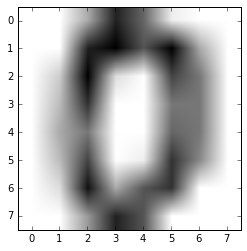

In [80]:
plt.imshow(np_image, cmap='gray_r')

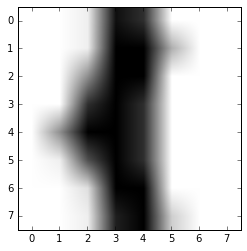

In [81]:
np_image2 = dataset.iloc[99].values.reshape(8,8)
plt.imshow(np_image2, cmap='gray_r')

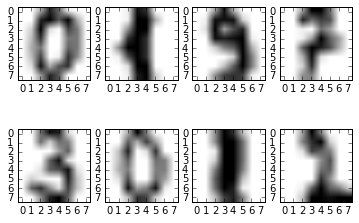

In [82]:
#displaying digits from rows 0,100,200,1000,1100,1200 and 1300
fig,axs = plt.subplots(2,4)
axs[0,0].imshow(np_image, cmap='gray_r')
axs[0,1].imshow(np_image2, cmap='gray_r')
axs[0,2].imshow(dataset.iloc[199].values.reshape(8,8), cmap='gray_r')
axs[0,3].imshow(dataset.iloc[299].values.reshape(8,8), cmap='gray_r')
axs[1,0].imshow(dataset.iloc[999].values.reshape(8,8), cmap='gray_r')
axs[1,1].imshow(dataset.iloc[1099].values.reshape(8,8), cmap='gray_r')
axs[1,2].imshow(dataset.iloc[1199].values.reshape(8,8), cmap='gray_r')
axs[1,3].imshow(dataset.iloc[1299].values.reshape(8,8), cmap='gray_r')

In [83]:
#Creating functions to train model and test model
def train_dataset(k,training_features,training_labels):
    training_model=KNeighborsClassifier(n_neighbors=k)
    training_model.fit(training_features,training_labels)
    return training_model


def test_dataset(training_model,test_features,test_labels):
    predicted_labels=training_model.predict(test_features)
    df=pd.DataFrame()
    df['actual_labels']=test_labels
    df['predicted_labels']=predicted_labels
    accuracy=np.round(len(df[df['actual_labels']==df['predicted_labels']])*100/len(df),2)
    return accuracy

#Also creating a function to cross validate using Kfold Implementation with 4 splits
def cross_validate(k):
    fold_accuracies=[]
    kf = KFold(n_splits=4,random_state=2)
    for train_index,test_index in kf.split(dataset):
        training_features=dataset.loc[train_index]
        test_features=dataset.loc[test_index]
        training_labels=labels[train_index]
        test_labels=labels[test_index]
        
        model = train_dataset(k,training_features,training_labels)
        accuracy=test_dataset(model,test_features,test_labels)
        fold_accuracies.append(accuracy)
        
    return fold_accuracies


        

In [84]:
#testing with k=1
accuracies_set=cross_validate(1)
overall_avg_accuracy=np.mean(accuracies_set)
print('Avg accuracy with k=1 is {}'.format(overall_avg_accuracy))

Avg accuracy with k=1 is 96.7725


In [85]:
#testing with k=5
accuracies_set=cross_validate(5)
overall_avg_accuracy=np.mean(accuracies_set)
print('Avg accuracy with k=5 is {}'.format(overall_avg_accuracy))

Avg accuracy with k=5 is 96.2175


In [86]:
#testing with k=10
accuracies_set=cross_validate(10)
overall_avg_accuracy=np.mean(accuracies_set)
print('Avg accuracy with k=5 is {}'.format(overall_avg_accuracy))

Avg accuracy with k=5 is 95.2725


In [99]:
#Implementing a neural netork model
#Creating functions to train model and test model
def train_dataset(neuron_set,training_features,training_labels):
    training_model=MLPClassifier(hidden_layer_sizes=neuron_set)
    training_model.fit(training_features,training_labels)
    return training_model


def test_dataset(training_model,test_features,test_labels):
    predicted_labels=training_model.predict(test_features)
    df=pd.DataFrame()
    df['actual_labels']=test_labels
    df['predicted_labels']=predicted_labels
    accuracy=np.round(len(df[df['actual_labels']==df['predicted_labels']])*100/len(df),2)
    return accuracy

#Also creating a function to cross validate using Kfold Implementation with 4 splits
def cross_validate(neuron_set,kfold=4):
    fold_accuracies=[]
    kf = KFold(n_splits=kfold,random_state=2)
    for train_index,test_index in kf.split(dataset):
        training_features=dataset.loc[train_index]
        test_features=dataset.loc[test_index]
        training_labels=labels[train_index]
        test_labels=labels[test_index]
        model = train_dataset(neuron_set,training_features,training_labels)
        accuracy=test_dataset(model,test_features,test_labels)
        fold_accuracies.append(accuracy)
        
    return fold_accuracies


In [101]:
#testing with a single hidden layer and changing number of neurons in the layer.
neuron_sets=[(8,),(16,),(32,),(64,),(128,),(256,)]
accuracies_list=[]
for neurons in neuron_sets:
    accuracies_set=cross_validate(neurons)
    overall_avg_accuracy=np.round(np.mean(accuracies_set),2)
    print('Avg accuracy with 1 hidden layer and no of neurons as {} is {}'.format(neurons[0],overall_avg_accuracy))
    accuracies_list.append(overall_avg_accuracy)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



Avg accuracy with 1 hidden layer and no of neurons as 8 is 83.97
Avg accuracy with 1 hidden layer and no of neurons as 16 is 91.59
Avg accuracy with 1 hidden layer and no of neurons as 32 is 93.27
Avg accuracy with 1 hidden layer and no of neurons as 64 is 92.82
Avg accuracy with 1 hidden layer and no of neurons as 128 is 93.99
Avg accuracy with 1 hidden layer and no of neurons as 256 is 94.99


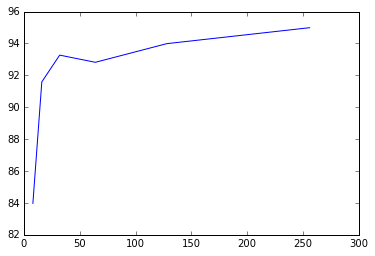

In [102]:
#plotting accuracy rate vs number of neurons in each layer to see 
#how much the model improves by increasing the number of neurons
X=[8,16,32,64,128,256]
plt.plot(X,accuracies_list)

In [103]:
#testing with a 2 hidden layer and changing number of neurons in the layer.
neuron_sets=[(64,64),(128,128),(256,256)]
accuracies_list_v2=[]
for neurons in neuron_sets:
    accuracies_set=cross_validate(neurons)
    overall_avg_accuracy=np.round(np.mean(accuracies_set),2)
    print('Avg accuracy with 2 hidden layers no of neurons as {} is {}'.format(neurons[0],overall_avg_accuracy))
    accuracies_list_v2.append(overall_avg_accuracy)

Avg accuracy with 2 hidden layers no of neurons as 64 is 93.82
Avg accuracy with 2 hidden layers no of neurons as 128 is 94.66
Avg accuracy with 2 hidden layers no of neurons as 256 is 95.82


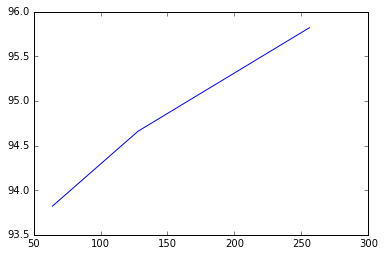

In [104]:
#plotting accuracy rate vs number of neurons in each layer to see 
#how much the model improves by increasing the number of neurons
X=[64,128,256]
plt.plot(X,accuracies_list_v2)

In [105]:
#testing with a 3 hidden layer and changing number of neurons in the layer.
#also changing the folds to 6 to see how accuracy varies
neuron_sets=[(10,10,10),(64,64,64),(128,128,128)]
accuracies_list_v3=[]
for neurons in neuron_sets:
    accuracies_set=cross_validate(neurons,kfold=6)
    overall_avg_accuracy=np.round(np.mean(accuracies_set),2)
    print('Avg accuracy with 3 hidden layers and no of neurons as {} is {}'.format(neurons[0],overall_avg_accuracy))
    accuracies_list_v3.append(overall_avg_accuracy)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



Avg accuracy with 3 hidden layers and no of neurons as 10 is 90.71
Avg accuracy with 3 hidden layers and no of neurons as 64 is 94.66
Avg accuracy with 3 hidden layers and no of neurons as 128 is 95.99


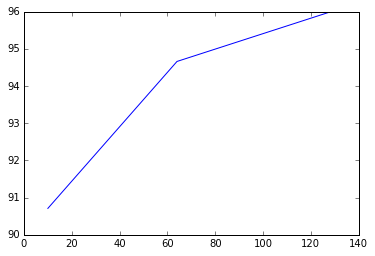

In [106]:
#plotting accuracy rate vs number of neurons in each layer to see 
#how much the model improves by increasing the number of neurons
X=[10,64,128]
plt.plot(X,accuracies_list_v3)

### Conclusion
By increasing the number of hidden layers and number of neurons in each layer we were able to achieve better results and a accuracy of almost 96%.